This code explores the E. coli dataset, defines a test harness for evaluating candidate models, and evaluates the following ML models: Random Forest, k-Nearest Neighbors, Linear Discriminant Analysis and Support Vector Machine.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#Import data
dataset = pd.read_csv('ecoli.csv', header = None)
print(dataset.shape)

(327, 8)


In [3]:
#Describe dataset
pd.set_option('precision', 3)
print(dataset.describe())

             0       1        2      3        4        5        6
count  327.000  327.00  327.000  327.0  327.000  327.000  327.000
mean     0.494    0.50    0.485    0.5    0.499    0.497    0.503
std      0.194    0.15    0.050    0.0    0.123    0.217    0.207
min      0.000    0.16    0.480    0.5    0.000    0.030    0.000
25%      0.340    0.40    0.480    0.5    0.420    0.330    0.350
50%      0.490    0.47    0.480    0.5    0.490    0.450    0.430
75%      0.655    0.57    0.480    0.5    0.570    0.710    0.710
max      0.890    1.00    1.000    0.5    0.880    1.000    0.990


In [4]:
#Summarize class distribution
target = dataset.values[:, -1]
counter = Counter(target)

for protein_class, count in counter.items():
    percentage = count / len(target) * 100
    print('Class = %s, Count = %d, Percentage = %.3f%%' % (protein_class, count, percentage))

Class = cp, Count = 143, Percentage = 43.731%
Class = im, Count = 77, Percentage = 23.547%
Class = imU, Count = 35, Percentage = 10.703%
Class = om, Count = 20, Percentage = 6.116%
Class = pp, Count = 52, Percentage = 15.902%


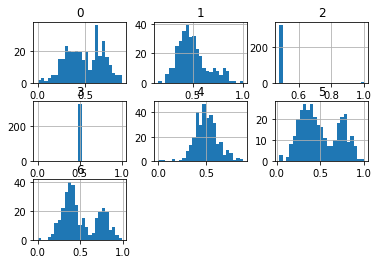

In [5]:
#Create histogram plot of each variable
dataset.hist(bins = 25)
plt.show()

In [6]:
#Split into features & labels
data = dataset.values
x, y = data[:, :-1], data[:, -1]

In [7]:
#Encode target labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

print(x.shape, y.shape, Counter(y))

(327, 7) (327,) Counter({0: 143, 1: 77, 4: 52, 2: 35, 3: 20})


In [8]:
#Define reference model
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy = 'most_frequent')

In [9]:
#Test baseline model
#k-fold cross-validation procedure provides good general estimate of model performance that is not too optimistically biased
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

def evaluate_model(x, y, model):
    cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 3, random_state = 1)
    scores = cross_val_score(model, x, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    
    return scores
    
dummy_scores = evaluate_model(x, y, model)
print('Baseline model: Mean accuracy %.3f (%.3f)' % (np.mean(dummy_scores), np.std(dummy_scores)))

Baseline model: Mean accuracy 0.437 (0.003)


In [10]:
#Define candidate models
#Shortened names to be used for plotting results of model evaluation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

def get_models():
    models, short_names = list(), list()
    
    #Linear Discriminant Analysis
    models.append(LinearDiscriminantAnalysis())
    short_names.append('LDA')
    
    #Random Forest
    models.append(RandomForestClassifier(n_estimators=1000))
    short_names.append('RF')    
    
    #Support Vector Machine
    models.append(LinearSVC())
    short_names.append('SVM')
    
    #k-Nearest Neighbors
    models.append(KNeighborsClassifier(n_neighbors=3))
    short_names.append('KNN')

    return models, short_names

models, names = get_models()

In [11]:
#Evaluate candidate models

results = list()
chosen_model = ""
top_score = 0

for i in range(len(models)):
    scores = evaluate_model(x, y, models[i])
    results.append(scores)
    
    if np.mean(scores) > top_score:
        top_score = np.mean(scores)
        chosen_model = names[i]

    print('%s: Mean accuracy %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

LDA: Mean accuracy 0.881 (0.035)
RF: Mean accuracy 0.894 (0.035)
SVM: Mean accuracy 0.882 (0.036)
KNN: Mean accuracy 0.864 (0.027)


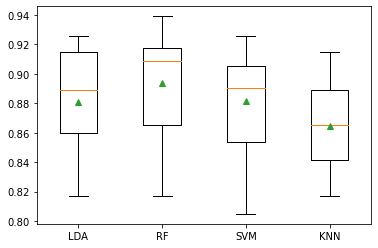

The best performing model was RF, with a mean accuracy of 0.894


In [12]:
#Plot results
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

print('The best performing model was %s, with a mean accuracy of %.3f' % (chosen_model, top_score))